In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print('### Marketing Funnel by Olist ###')
for idx, file in enumerate(os.listdir('marketing-funnel-olist')):
    print(idx, '-', file)
print('\n---------------------------------------------\n')

print('### Brazilian E-Commerce Public Dataset by Olist ###')
for idx, file in enumerate(os.listdir('brazilian-ecommerce')):
    print(idx, '-', file)

### Marketing Funnel by Olist ###
0 - olist_marketing_qualified_leads_dataset.csv
1 - olist_closed_deals_dataset.csv

---------------------------------------------

### Brazilian E-Commerce Public Dataset by Olist ###
0 - olist_sellers_dataset.csv
1 - product_category_name_translation.csv
2 - olist_orders_dataset.csv
3 - olist_order_items_dataset.csv
4 - olist_customers_dataset.csv
5 - olist_geolocation_dataset.csv
6 - olist_order_payments_dataset.csv
7 - olist_order_reviews_dataset.csv
8 - olist_products_dataset.csv


# Data Joins

In [2]:
# leads data
mql = pd.read_csv('marketing-funnel-olist/olist_marketing_qualified_leads_dataset.csv')
mql.head(10)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social


In [3]:
# closed deals dataset
cd = pd.read_csv('marketing-funnel-olist/olist_closed_deals_dataset.csv')
cd.head(10)

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
5,b94fba7670eeb44dce2a0d8eb790e9f5,1c742ac33582852aaf3bcfbf5893abcf,fdb16d3cbbeb5798f2f66c4096be026d,495d4e95a8cf8bbf8b432b612a2aa328,2018-02-07 18:04:05,health_beauty,online_medium,NaN,NaN,NaN,NaN,manufacturer,NaN,0.0
6,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
7,b02c89251106e1fdd9d92744be9f94f2,44ed138eca6214d572ce1d813fb0049b,34d40cdaf94010a1d05b0d6212f9e909,4ef15afb4b2723d8f3d81e51ec7afefe,2018-04-17 17:01:57,health_beauty,offline,cat,NaN,NaN,NaN,manufacturer,NaN,0.0
8,a90a37898cc5f2718385a2fb981caaff,0b28859cd04d23edefee9c591fb03cd8,f42a2bd194f7802ab052a815c8de65b7,6565aa9ce3178a5caf6171827af3a9ba,2018-05-14 18:37:15,household_utilities,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
9,0173e8d8b1d94a355b440fb67388f532,87d73636a3acf123e842bb890a4db036,9d12ef1a7eca3ec58c545c678af7869c,9e4d1098a3b0f5da39b0bc48f9876645,2018-04-24 03:00:00,household_utilities,online_medium,eagle,NaN,NaN,NaN,manufacturer,NaN,0.0


In [4]:
# marketing funnel dataset (NaNs are leads that did not close a deal)
mf = mql.merge(cd, on='mql_id', how='left')
mf.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# sellers dataset
sellers = pd.read_csv('brazilian-ecommerce/olist_sellers_dataset.csv')
sellers.head(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [6]:
# marketing funnel merged with sellers
mf_sellers = mf.merge(sellers, on='seller_id', how='left')
mf_sellers.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,seller_zip_code_prefix,seller_city,seller_state
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0,30421.0,belo horizonte,MG
5,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2f838cade4a6012a6cb1016d1d8d95ed,2017-11-10,aeac92c0f5ae22a04ed3b746cce3a1b6,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7281942387a1a0c3f72a50a8b0bb0920,2017-12-25,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# order items dataset
items = pd.read_csv('brazilian-ecommerce/olist_order_items_dataset.csv')
items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


In [10]:
# marketing funnel merged with items (this way you get products sold by sellers)
mf_items = mf.merge(items, on='seller_id', how='left')
mf_items.head(10)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76
5,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,d8d281c1a1398a1e835fdc4adfb81e2a,1.0,9e0873e9ac04b12f282b81af5daebd2e,2018-07-30 09:31:49,664.0,38.41
6,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,NaN,reseller,NaN,0.0,e5858127da61f07285827883e605254b,1.0,9bb2d066e4b33b624cbdfec7d50b3dcb,2018-06-27 16:00:04,99.8,15.00
7,28bdfd5f057764b54c38770f95c69f2f,2018-01-14,22c29808c4f815213303f8933030604c,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,126a0d10becbaafcb2e72ce6848cf32c,2018-05-15,6a110e795dd487f1cf8d7583671987af,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,f76136f54d14a3345951f25b7932366b,2018-05-24,d51b0d02f063ba1d053db6d97226eec3,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Channels Analysis

In [11]:
mf_items.shape

(12664, 23)

In [12]:
# What channels are the most favourable for conversion of leads?
closedDeals = mf_items[~mf_items['seller_id'].isnull()]

In [13]:
closedChannels = closedDeals['origin'].value_counts()
df_cc = closedChannels.to_frame()
df_cc.rename(columns={'origin':'freq'}, 
                 inplace=True)
df_cc

,freq
paid_search,1542
organic_search,1504
unknown,1470
social,488
direct_traffic,243
other,99
referral,92
email,33
display,11
other_publicities,3


In [14]:
df_cc = df_cc.sort_index()

In [15]:
allChannels = mf_items['origin'].value_counts()
df_all = allChannels.to_frame()
df_all.rename(columns={'origin':'freq'}, 
                 inplace=True)
df_all

,freq
organic_search,3529
paid_search,2933
unknown,2390
social,1763
direct_traffic,686
email,511
referral,352
other,245
display,123
other_publicities,65


In [16]:
df_all = df_all.sort_index()

In [17]:
df_conversion = df_cc/df_all
df_conversion.rename(columns={'freq':'conv'}, 
                 inplace=True)
# sorted by conversion rates best to worst
df_conversion.sort_values(by=['conv'],ascending=False)

,conv
unknown,0.615063
paid_search,0.525742
organic_search,0.426183
other,0.404082
direct_traffic,0.354227
social,0.276801
referral,0.261364
display,0.089431
email,0.064579
other_publicities,0.046154


### Paid search and Organic search are the top performing channels

## City level analysis

In [35]:
mf_items_cities = mf_items.merge(sellers, on='seller_id', how='left')
mf_items_cities.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,...,0.0,1efcc6ba75b519535a510c53153a9256,1.0,e94df75b2e9a8b056be0c144a731f55c,2018-06-26 22:20:21,94.2,18.76,30421.0,belo horizonte,MG


In [38]:
closedDealsCities = mf_items_cities[~mf_items_cities['seller_id'].isnull()]
closedDealsCities['start_date'] = pd.to_datetime(closedDealsCities['first_contact_date'])
closedDealsCities['end_date'] = pd.to_datetime(closedDealsCities['won_date'])
closedDealsCities['time_to_close'] = closedDeals['end_date'] - closedDeals['start_date']
closedDealsCitiesSorted  = closedDealsCities.sort_values(by=['time_to_close'],ascending=False)
closedDealsCitiesSorted.head(5)

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,product_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,start_date,end_date,time_to_close
10732,33ce1e734d9d50629fa2c36769285d53,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,NaN,53be10ff134691e94a4089b41c75874f,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-11,2018-09-11 13:14:37,427 days 13:14:37
7490,c5b432382d5978b94676426a32725dff,2017-09-25,87d670b00a8db612286ba8419cf82e83,paid_search,3cbdc3237aa8afe44324bda4a1ccf676,b34f6eba10f46bf9a657a01c108a8284,a8387c01a09e99ce014107505b92388c,2018-10-03 18:32:49,car_accessories,offline,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-25,2018-10-03 18:32:49,373 days 18:32:49
9405,b39ac02ff5021fed10cb9988a23d5d02,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,7c7d0dee362960b1d9b01fe7284e19ba,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-17,2018-08-23 21:56:01,371 days 21:56:01
3458,e2e57ded5b59a2058dd5855564c6b5ea,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,...,b1e8074e6497dd78a58f993589bc09a2,2018-08-08 11:10:19,46.90,19.52,17400.0,garca,SP,2017-07-14,2018-07-18 20:24:28,369 days 20:24:28
3459,e2e57ded5b59a2058dd5855564c6b5ea,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,...,f54815785eb4b1d0fb3f5e81080694ff,2018-08-24 04:05:17,55.15,19.58,17400.0,garca,SP,2017-07-14,2018-07-18 20:24:28,369 days 20:24:28


In [48]:
closedDealsCitiesSorted['time_to_close_days'] = (closedDealsCitiesSorted['time_to_close'] - closedDealsCitiesSorted['time_to_close'].min()) / np.timedelta64(1,'D')

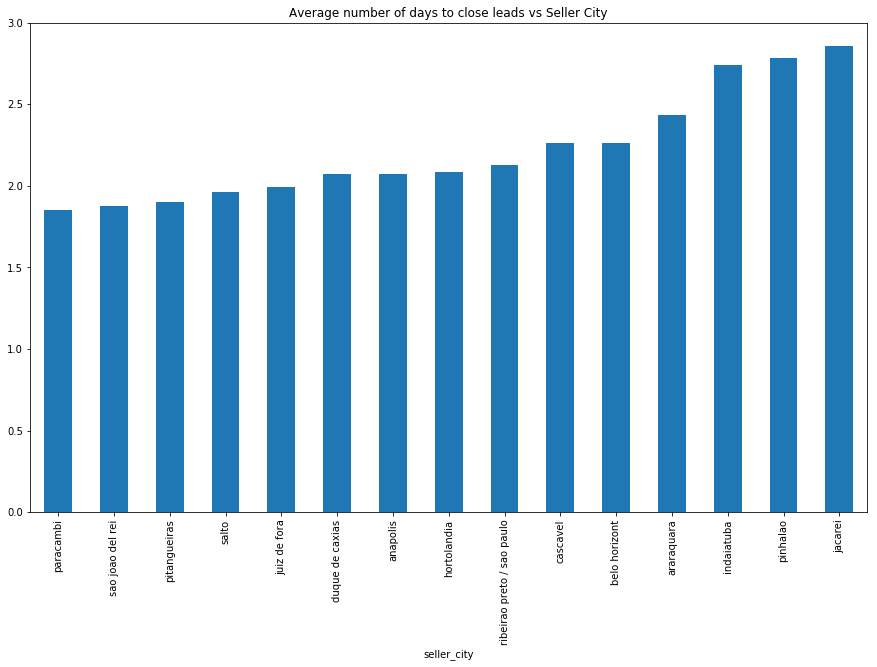

In [49]:
topCities = closedDealsCitiesSorted.groupby(["seller_city"])['time_to_close_days'].mean().sort_values(ascending=True).head(15)
topCities.plot(kind='bar',figsize=(15,9), title = 'Average number of days to close leads vs Seller City')

Olist should look to expand operations in the cities from the chart above. Particularly, in Paracambi, Sao Joao del Rei, Pitangueiras, and Salto, there are sellers that have some of the fastest times when it comes to converting leads to closed deals.

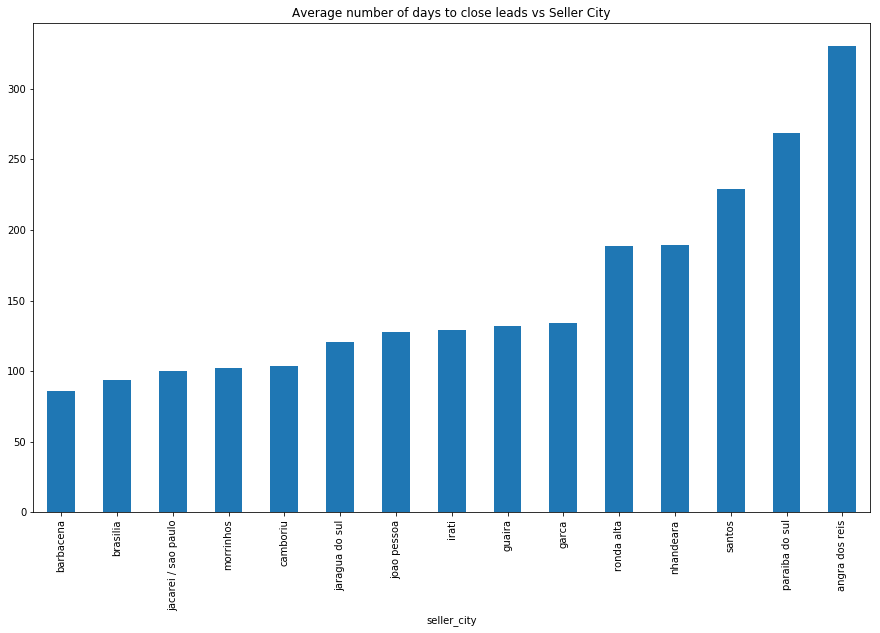

In [47]:
bottomCities = closedDealsCitiesSorted.groupby(["seller_city"])['time_to_close_days'].mean().sort_values(ascending=True).tail(15)
bottomCities.plot(kind='bar',figsize=(15,9), title = 'Average number of days to close leads vs Seller City')

The above cities have sellers which take considerably long periods of time to convert a lead into a deal.

# Category level Analysis

In [18]:
closedDeals['start_date'] = pd.to_datetime(closedDeals['first_contact_date'])
closedDeals['end_date'] = pd.to_datetime(closedDeals['won_date'])

In [19]:
closedDeals['time_to_close'] = closedDeals['end_date'] - closedDeals['start_date']

In [20]:
closedDealsSorted  = closedDeals.sort_values(by=['time_to_close'],ascending=False)

In [21]:
closedDealsSorted

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,declared_monthly_revenue,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,start_date,end_date,time_to_close
10732,33ce1e734d9d50629fa2c36769285d53,2017-07-11,d41d8cd98f00b204e9800998ecf8427e,NaN,53be10ff134691e94a4089b41c75874f,2b63542749aa9caf15f21816da1db341,d3d1e91a157ea7f90548eef82f1955e3,2018-09-11 13:14:37,construction_tools_house_garden,online_small,...,130000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-11,2018-09-11 13:14:37,427 days 13:14:37
7490,c5b432382d5978b94676426a32725dff,2017-09-25,87d670b00a8db612286ba8419cf82e83,paid_search,3cbdc3237aa8afe44324bda4a1ccf676,b34f6eba10f46bf9a657a01c108a8284,a8387c01a09e99ce014107505b92388c,2018-10-03 18:32:49,car_accessories,offline,...,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-25,2018-10-03 18:32:49,373 days 18:32:49
9405,b39ac02ff5021fed10cb9988a23d5d02,2017-08-17,1722481ac9e5371e5099dea226b5421d,social,7c7d0dee362960b1d9b01fe7284e19ba,6aa3b86a83d784b05f0e37e26b20860d,56bf83c4bb35763a51c2baab501b4c67,2018-08-23 21:56:01,home_decor,online_small,...,300000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-17,2018-08-23 21:56:01,371 days 21:56:01
3458,e2e57ded5b59a2058dd5855564c6b5ea,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,...,0.0,4f4da9932bc77a525ca672e3b1b232f6,1.0,b1e8074e6497dd78a58f993589bc09a2,2018-08-08 11:10:19,46.90,19.52,2017-07-14,2018-07-18 20:24:28,369 days 20:24:28
3459,e2e57ded5b59a2058dd5855564c6b5ea,2017-07-14,b76ef37428e6799c421989521c0e5077,unknown,160851d3ece7aa1a510f8d1a4bb8a8af,b90f87164b5f8c2cfa5c8572834dbe3f,4b339f9567d060bcea4f5136b9f5949e,2018-07-18 20:24:28,construction_tools_house_garden,industry,...,0.0,ef2960fc071e710c211bfd7d7de5ca8e,1.0,f54815785eb4b1d0fb3f5e81080694ff,2018-08-24 04:05:17,55.15,19.58,2017-07-14,2018-07-18 20:24:28,369 days 20:24:28
11886,a57bf18e19b6b17e3d4fbc20561e2055,2017-09-01,3c5cc1a2e1d86abfce2a16a1bcc80e26,organic_search,2a17b229ca84523393b003b7e0bfae63,f42a2bd194f7802ab052a815c8de65b7,9d12ef1a7eca3ec58c545c678af7869c,2018-08-20 14:41:13,toys,online_small,...,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-01,2018-08-20 14:41:13,353 days 14:41:13
8142,0383bd4aa37e8dd109be3864bc703eda,2017-10-26,733adfe409c752b5c200bf23fa2f22d0,paid_search,9fbe791853dbd2e3894d85162a8ff934,45749fb708130f78d0db07d8d80f030b,4b339f9567d060bcea4f5136b9f5949e,2018-10-02 21:25:39,car_accessories,online_medium,...,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-10-26,2018-10-02 21:25:39,341 days 21:25:39
9701,d79c868179307f1cf78d0a12c56e2bf9,2017-09-23,22c29808c4f815213303f8933030604c,organic_search,25ca84afdd32ede184dba55631c55274,e7dff61b78bebffa71678e126ce669ad,068066e24f0c643eb1d089c7dd20cd73,2018-08-30 12:32:15,computers,online_big,...,60000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-09-23,2018-08-30 12:32:15,341 days 12:32:15
11378,680fd12be44eee12aee2a2e023438a5d,2017-08-31,e492ee5eaf1697716985cc6f33f9cd9b,paid_search,535bf14f36346c7f59d87cece104d70c,45749fb708130f78d0db07d8d80f030b,9d12ef1a7eca3ec58c545c678af7869c,2018-08-07 12:21:06,home_decor,online_medium,...,0.0,f4981812af9b38cde6d9d481c1c88981,1.0,a2f108447e5847c9edd533c37908bf01,2018-08-24 11:30:40,50.00,7.77,2017-08-31,2018-08-07 12:21:06,341 days 12:21:06
2562,d768d7e09a6f9ff4146a1659635cf304,2017-11-24,b76ef37428e6799c421989521c0e5077,unknown,f233b575e585413f12fe2f847d922447,282f16e20d50cb18d05182e80f6b9dd6,d3d1e91a157ea7f90548eef82f1955e3,2018-10-30 18:21:05,household_utilities,online_big,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-24,2018-10-30 18:21:05,340 days 18:21:05


In [22]:
closedDealsSorted.groupby(["business_segment"])['declared_monthly_revenue'].mean().sort_values(ascending=False)

business_segment
other                              208666.666667
construction_tools_house_garden    142802.833803
phone_mobile                       125000.000000
perfume                              7500.000000
party                                2857.142857
toys                                 1977.099237
stationery                           1515.151515
home_decor                           1384.015595
pet                                  1003.344482
car_accessories                       876.777251
audio_video_electronics               876.623377
computers                             714.285714
health_beauty                         339.470656
household_utilities                   277.210884
food_drink                            151.515152
bed_bath_table                        150.000000
watches                                 1.669449
books                                   0.000000
bags_backpacks                          0.000000
baby                                    0.000000
fas

In [23]:
closedDealsSorted['business_segment'].head(50)

10732    construction_tools_house_garden
7490                     car_accessories
9405                          home_decor
3458     construction_tools_house_garden
3459     construction_tools_house_garden
11886                               toys
8142                     car_accessories
9701                           computers
11378                         home_decor
2562                 household_utilities
9159                                 pet
3811                     car_accessories
4032                 household_utilities
3765     construction_tools_house_garden
3764     construction_tools_house_garden
3761     construction_tools_house_garden
3760     construction_tools_house_garden
3763     construction_tools_house_garden
3762     construction_tools_house_garden
8172                          home_decor
11423                household_utilities
5785                 household_utilities
10857            audio_video_electronics
1938     construction_tools_house_garden
3339            

In [24]:
closedDealsSorted['time_to_close_days'] = (closedDealsSorted['time_to_close'] - closedDealsSorted['time_to_close'].min()) / np.timedelta64(1,'D')

In [25]:
closedDealsBySegment = closedDealsSorted.groupby(["business_segment"])['time_to_close_days'].mean().sort_values(ascending=False)
closedDealsBySegment

business_segment
other                              255.646208
perfume                            150.797008
home_appliances                     82.553797
computers                           66.861160
gifts                               66.051365
baby                                59.651602
handcrafted                         55.476916
jewerly                             53.669239
music_instruments                   44.209963
games_consoles                      36.621831
audio_video_electronics             36.620186
party                               35.355633
food_supplement                     34.566216
home_decor                          30.657176
construction_tools_house_garden     29.709164
car_accessories                     28.833517
phone_mobile                        26.507683
household_utilities                 22.944978
pet                                 22.085288
food_drink                          21.668866
air_conditioning                    21.472222
sports_leisure   

In [26]:
# closedDealsSorted.loc[:,['time_to_close','time_to_close_days']]

In [27]:
closedDealsSorted[closedDealsSorted['business_segment'] == 'perfume']

,mql_id,first_contact_date,landing_page_id,origin,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,...,order_id,order_item_id,product_id,shipping_limit_date,price,freight_value,start_date,end_date,time_to_close,time_to_close_days
4163,4fbe9e8a0ace3a44f0a9e1d7fe41da02,2018-04-09,22c29808c4f815213303f8933030604c,organic_search,9169e322ad3419286d1e5ee8f1c3b3f0,e7dff61b78bebffa71678e126ce669ad,34d40cdaf94010a1d05b0d6212f9e909,2018-11-01 15:36:16,perfume,online_medium,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-09,2018-11-01 15:36:16,206 days 15:36:16,207.831493
4692,54007efbb2ae51f02c995466f0738caa,2018-05-14,ce1a65abd0973638f1c887a6efcfa82d,organic_search,7d91f9d655df761fd0cf119733a61e74,b90f87164b5f8c2cfa5c8572834dbe3f,9d12ef1a7eca3ec58c545c678af7869c,2018-08-14 13:56:57,perfume,online_medium,...,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-14,2018-08-14 13:56:57,92 days 13:56:57,93.762523


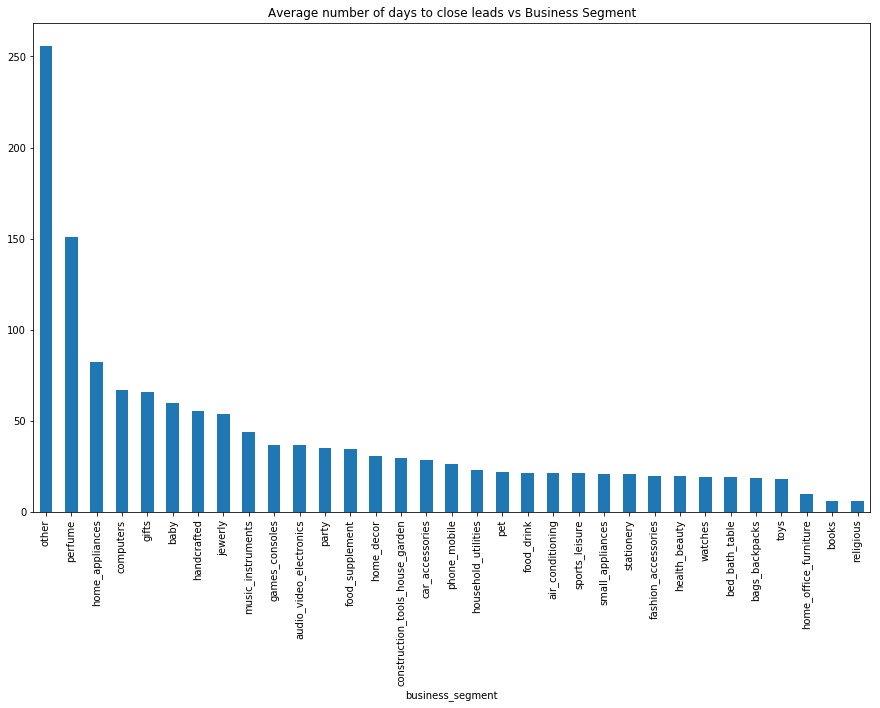

In [28]:
closedDealsBySegment.plot(kind='bar',figsize=(15,9), title = 'Average number of days to close leads vs Business Segment')

Perfume, Home appliances, and Computers are the business segments which take the longest amount of time to close. In the case of perfume, there were only two orders which maybe why the numbers are so large and far outside the range compared to other categories.